In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [7]:
np.random.seed(1)

x = np.sort(np.random.rand(50))

y = np.cos(1.5 * np.pi * x) + np.random.randn(50) * 0.3

x = x.reshape(-1, 1)

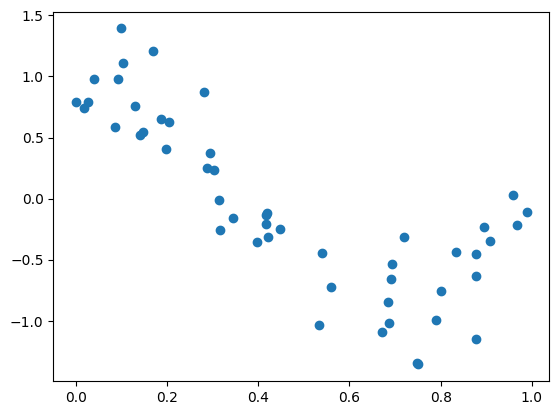

In [8]:
plt.scatter(x, y)

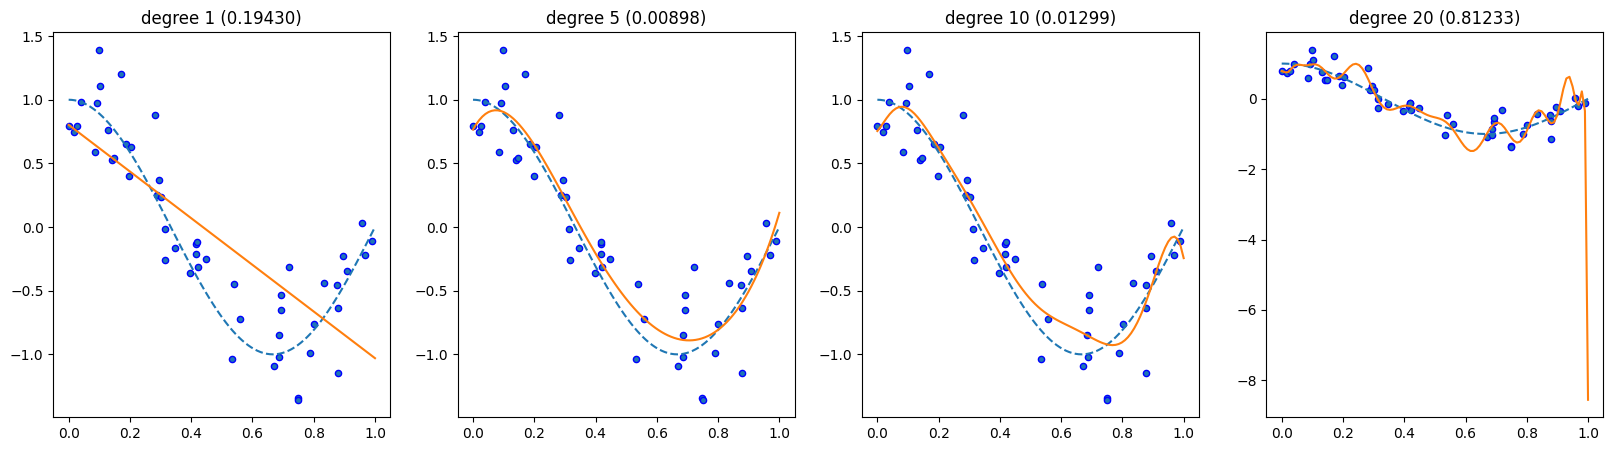

In [4]:
plt.figure(figsize=(20, 5))

degrees = [1, 5, 10, 20]

for i in range(len(degrees)):
    ax = plt.subplot(1, len(degrees), i + 1)
    
    # 실제 값
    plt.scatter(x, y, edgecolors="b", s=20)
    
    # 노이즈 없을 때 곡선
    x_test = np.linspace(0, 1, 100)
    y_test = np.cos(1.5 * np.pi * x_test)
    plt.plot(x_test, y_test, '--')
    
    # poly 곡선
    poly = PolynomialFeatures(degree=degrees[i], include_bias=False)
    x_poly = poly.fit_transform(x)
    
    model = LinearRegression()
    model.fit(x_poly, y)
    
    predict = model.predict(poly.fit_transform(x_test.reshape(-1, 1)))
    plt.plot(x_test, predict)
    
    plt.title(f"degree {degrees[i]} ({mean_squared_error(y_test, predict):.5f})")

plt.show()

과대 적합 (overfitting)

-> 주어진 입력 데이터에 비하여 모델의 복잡도가 너무 높아 입력 데이터의 잡음까지 fitting하는 경향을 보이고, 일반화에 실패하는 상황


과소 적합 (underfitting)

-> 주어진 입력 데이터에 비하여 모델의 복잡도가 너무 낮아 입력 데이터로부터 충분히 학습하지 못하는 상황
